In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML

In [5]:
data = datasets.load_boston()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name="target")

In [6]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
automl = AutoML(total_time_limit=60*60) # 1 hour
automl.fit(X_train, y_train)

Create directory AutoML_1
AutoML task to be solved: regression
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost']
AutoML will optimize for metric: mse
AutoML will try to check about 74 models
Baseline final mse 83.84870669125685 time 0.14 seconds
Linear final mse 21.92937881043018 time 11.22 seconds
Decision Tree final mse 18.90219678217822 time 22.19 seconds
Decision Tree final mse 17.698275924839862 time 22.23 seconds
Decision Tree final mse 48.81436938580407 time 9.97 seconds
Xgboost final mse 15.410453967511462 time 46.42 seconds
Random Forest final mse 21.436336108442347 time 36.29 seconds
Xgboost final mse 11.271897594648355 time 71.67 seconds
Xgboost final mse 13.919386076288882 time 47.27 seconds
CatBoost final mse 15.00553763884898 time 8.39 seconds
Extra Trees final mse 32.511815053261735 time 28.66 seconds
CatBoost final mse 9.835487346498168 time 23.99 seconds
LightGBM final mse 12.733826144

In [10]:
pred = automl.predict(X_test)

In [11]:
pred.head()

,prediction
0,27.134437
1,20.415485
2,23.586178
3,19.883797
4,18.228882


In [12]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Predicted value')

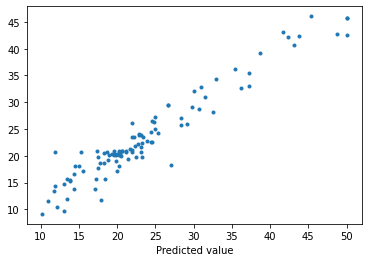

In [14]:
plt.plot(y_test, pred.prediction, '.')
plt.xlabel("True value")
plt.xlabel("Predicted value")

In [16]:
# Mean Absolute Error on test data
np.mean(np.abs(y_test-pred.prediction))

8.396766574114492